# Technical Objective in short
Training on the 'Prop_Data_Final' dataset and testing on the 'Score2'

# Technical Objective in detail
***
Your objective is to predict the sales price of 100 real estate properties before they are actually sold. To build the best model with the highest predictive power, you need to train many models and select the best one which you will deploy into making the predictions.<br><br>
There are several ways you can try to boost the generalization of the model without having to build super complex algorithms.<br><br>
**One approach** you may want to consider is spend a good amount of time understanding the data in terms of the **informative attributes**. What are the correlations between the target variable and the input variables you have? What input variables are redundant?<br><br>
An attribute (i.e., feature, variable) isn't necessarily informative in its original scale and shape. You can consider transforming it to make it more "accessible" for your algorithms to exploit. Besides the necessary techniques that you have to use in order to include the variables of certain types, e.g.,
- categorizing, recoding, and/or re-weighting nominal/ordinal variables
- standardizing interval variables for algorithms such as kNN<br>

you may also find it benefitial to logarithm-transform certain interval input variables, and maybe even the target variable, if the true relationship between the target and the input variables are better captured after the log-transformation. This may be true if both the target and the input variables are interval and have similarly skewed distributions with outliers that similarly lie at the extreme end of the corresponding distribution. In this case, log-transforming both the target and the input will help you better deal with the outliers and decrease the _mean absolute percentage error_.<br><br>

Though increasing model complexity can help improve accuracy, you want to avoid too much of overfitting. The art of balancing the bias-variance tradeoff is a topic of _regularization_. Regularization is beyond the scope of this course; however, I encourage you to self-learn the essence this concept and explore the regularization tools provided in `sklearn` or even beyond `sklearn` package. <u>_That said, this is not required, and is only recommended after you have fulfilled all necessary steps of this project._</u> Good luck!

# Project Domain and Dataset
***
### Predicting the Sales Price of Real Estate Properties
The entire training data consist of 4 data files (.csv format), that is, "Property_Survey_1", "Property_Survey_2", "House_Features", and "Quality_Assessment". After _reading_ each data file, eventually you might want to merge them into a single DataFrame; before merging, however, you need to understand the underlying _associations_ of the data contained in each of the data files.

# Hands-on Section
***
Use the space below to build the prerequisite of the project

## Step 0. Import Necessary Packages, Define Utilities
This space is for importing packages and, if needed, for defining any custom functions that may help enhance the efficiency of your project flow as well as the readability of your project codes

In [57]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib notebook

# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [61]:
# Returns Datatype of each column
df.dtypes

PID               int64
YearBuilt         int64
YearRemodel       int64
VeneerExterior    int64
BsmtFinTp         int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathBsmt      int64
HalfBathHouse     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
SalePrice         int64
dtype: object

In [62]:
# Returns the statistics of each column
df.describe()

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
count,2.370000e+03,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,...,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,7.153307e+08,1970.570886,1984.086920,88.143882,0.704641,429.805907,557.101688,2.153586,1116.442616,325.198734,...,1.508017,2.816456,6.258650,0.589451,2.232911,1.718987,457.978903,91.650633,46.002532,173730.772574
std,1.886401e+08,30.109415,20.694221,158.718586,0.456300,408.779757,410.685375,0.944222,344.282409,406.198426,...,0.501727,0.742817,1.392625,0.630429,1.010171,0.708998,197.608559,120.616635,64.245617,64080.843305
min,5.263011e+08,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,5.313690e+08,1953.000000,1965.000000,0.000000,0.000000,0.000000,239.250000,1.000000,864.000000,0.000000,...,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,312.000000,0.000000,0.000000,129900.000000
50%,5.354551e+08,1972.000000,1993.000000,0.000000,1.000000,378.000000,470.000000,3.000000,1056.000000,0.000000,...,2.000000,3.000000,6.000000,1.000000,3.000000,2.000000,463.000000,0.000000,25.000000,159000.000000
75%,9.071351e+08,1999.000000,2003.000000,144.000000,1.000000,715.500000,792.000000,3.000000,1331.500000,688.750000,...,2.000000,3.000000,7.000000,1.000000,3.000000,2.000000,572.000000,168.000000,68.000000,207000.000000
max,1.007100e+09,2010.000000,2010.000000,1600.000000,1.000000,2085.000000,2140.000000,3.000000,2898.000000,1721.000000,...,2.000000,6.000000,12.000000,4.000000,3.000000,5.000000,1488.000000,736.000000,547.000000,475000.000000


,PID,OverallQuality,OverallCondition
count,2.370000e+03,2370.000000,2370.000000
mean,7.153307e+08,6.050633,5.630380
std,1.886401e+08,1.252423,1.095717
min,5.263011e+08,2.000000,1.000000
25%,5.313690e+08,5.000000,5.000000
50%,5.354551e+08,6.000000,5.000000
75%,9.071351e+08,7.000000,6.000000
max,1.007100e+09,10.000000,9.000000


In [28]:


Property_Survey.shape

(2370, 4)

In [80]:
#### Correlations
df = pd.merge(df,Property_Survey, how='outer', on=['PID'])

In [72]:
# Prop_data1 = Prop_Data[[columns]]
Prop_Data1 = df[['PID','SalePrice','YearBuilt','YearRemodel','VeneerExterior','BsmtFinTp','BsmtFinSqft','BsmtUnfinSqft','HeatingQC','FstFlrSqft','SecFlrSqft',
                    'AbvGrndLiving','FullBathBsmt','HalfBathHouse','FullBathHouse']]

# Prop_data2 = Prop_Data[[columns]]
Prop_Data2 = df[['PID','SalePrice', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars','GarageArea','WdDckSqft','OpenPrchSqft','SalePrice','OverallQuality_x',
                'OverallCondition_x', 'LotArea', 'LotShape', 'BldgTp']]


In [31]:
Prop_Data1.head(3)

,PID,SalePrice,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,AbvGrndLiving,FullBathBsmt,HalfBathHouse,FullBathHouse
0,526301100,215000,1960,1960,112,1,639,441,0,1656,0,1656,1,0,1
1,526350040,105000,1961,1961,0,1,468,270,1,896,0,896,0,0,1
2,526351010,172000,1958,1958,108,1,923,406,1,1329,0,1329,0,1,1


In [73]:
Prop_Data2.head(3)

,PID,SalePrice,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,OverallQuality_x,OverallCondition_x,LotArea,LotShape,BldgTp
0,526301100,215000,3,7,2,3,2,528,210,62,215000,6,5,31770,0,1
1,526350040,105000,2,5,0,3,1,730,140,0,105000,5,6,11622,1,1
2,526351010,172000,3,6,0,3,1,312,393,36,172000,6,6,14267,0,1


#### Final df

In [75]:
# Returns the correlation Prop_Data2
Prop_Data2.corr()

,PID,SalePrice,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,OverallQuality_x,OverallCondition_x,LotArea,LotShape,BldgTp
PID,1.000000,-0.220939,0.006184,-0.068212,-0.089072,-0.284161,-0.226571,-0.196249,-0.030366,-0.072043,-0.220939,-0.235921,0.137142,0.033321,0.117828,0.157367
SalePrice,-0.220939,1.000000,0.192239,0.527042,0.462909,0.459829,0.669653,0.652042,0.293314,0.334222,1.000000,0.780217,-0.136934,0.290162,-0.322661,0.035231
BdrmAbvGrnd,0.006184,0.192239,1.000000,0.680030,0.092314,0.010866,0.099996,0.087177,0.047128,0.108488,0.192239,0.089851,-0.001963,0.185440,-0.042815,0.368024
RmAbvGrnd,-0.068212,0.527042,0.680030,1.000000,0.313321,0.153998,0.347685,0.311000,0.152862,0.219257,0.527042,0.391820,-0.077297,0.217184,-0.135676,0.275416
Fireplaces,-0.089072,0.462909,0.092314,0.313321,1.000000,0.292059,0.298027,0.261026,0.191108,0.141652,0.462909,0.347647,-0.064555,0.261200,-0.187162,0.035758
GarageTp,-0.284161,0.459829,0.010866,0.153998,0.292059,1.000000,0.440926,0.415059,0.231618,0.135299,0.459829,0.400395,-0.201731,0.194103,-0.246136,-0.034654
GarageCars,-0.226571,0.669653,0.099996,0.347685,0.298027,0.440926,1.000000,0.882917,0.209642,0.202938,0.669653,0.592664,-0.221783,0.176603,-0.250359,-0.023170
GarageArea,-0.196249,0.652042,0.087177,0.311000,0.261026,0.415059,0.882917,1.000000,0.204467,0.209486,0.652042,0.535823,-0.192911,0.203278,-0.219441,0.046293
WdDckSqft,-0.030366,0.293314,0.047128,0.152862,0.191108,0.231618,0.209642,0.204467,1.000000,0.018564,0.293314,0.206190,-0.001546,0.117744,-0.167002,0.007968
OpenPrchSqft,-0.072043,0.334222,0.108488,0.219257,0.141652,0.135299,0.202938,0.209486,0.018564,1.000000,0.334222,0.283925,-0.090611,0.090270,-0.096851,-0.002307


KeyError: "['OverallQuality_x', 'OverallQuality_y'] not in index"

In [82]:
# Prop_Data_Final = Prop_Data[[columns]]

Prop_Data_Final =  df[['YearBuilt', 'YearRemodel', 'VeneerExterior', 'HeatingQC', 'FstFlrSqft', 'AbvGrndLiving', 'FullBathHouse','Fireplaces',  'GarageCars','GarageArea', 'OverallQuality']]

In [98]:
# Standardise values for the training set - do NOT standardise the y values

from sklearn import preprocessing

stand_dfX = preprocessing.scale(Prop_Data_Final)
stand_dfy = df['SalePrice']

In [99]:
# Transforming Array X into DF
col_names = Prop_Data_Final.columns
stand_dfX = pd.DataFrame(stand_dfX, columns=col_names)
stand_dfX.describe()


,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,Fireplaces,GarageCars,GarageArea,OverallQuality
count,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03,2370.000000,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03
mean,-3.371717e-16,-2.006646e-15,4.182309e-16,-4.917187e-16,6.581702e-17,7.605262e-17,0.000000,-1.637696e-16,-6.323118e-16,-3.074194e-17,-2.959658e-16
std,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00
min,-3.274447e+00,-1.647519e+00,-5.554641e-01,-2.281286e+00,-2.061076e+00,-2.332584e+00,-3.006288,-9.351983e-01,-2.425041e+00,-2.318096e+00,-3.234921e+00
25%,-5.836910e-01,-9.225256e-01,-5.554641e-01,-1.221990e+00,-7.333976e-01,-7.646949e-01,-1.012751,-9.351983e-01,-1.014303e+00,-7.388835e-01,-8.390576e-01
50%,4.747404e-02,4.307947e-01,-5.554641e-01,8.966028e-01,-1.755982e-01,-1.103791e-01,0.980787,6.513586e-01,3.964353e-01,2.541467e-02,-4.043651e-02
75%,9.443928e-01,9.141234e-01,3.519935e-01,8.966028e-01,6.247858e-01,5.444979e-01,0.980787,6.513586e-01,3.964353e-01,5.771266e-01,7.581846e-01
max,1.309804e+00,1.252453e+00,9.527398e+00,8.966028e-01,5.175790e+00,4.852545e+00,0.980787,5.411029e+00,4.628650e+00,5.213532e+00,3.154048e+00


In [100]:
# Transforming Array y into DF
stand_dfy = pd.DataFrame(stand_dfy, columns=['SalePrice'])

In [101]:
y = stand_dfy
X = stand_dfX

In [102]:
# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

#printing the output and coefficients
coeff_df = pd.DataFrame(linreg.coef_, columns=col_names) 
coeff_df

[173475.55630603]
[[10536.19667037  6546.86793664  2594.46020172  3123.661349
  11328.86182719 23216.85001483 -5788.43921488  5419.20506792
    987.14480973  8176.8366405  16299.74633836]]


,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,Fireplaces,GarageCars,GarageArea,OverallQuality
0,10536.19667,6546.867937,2594.460202,3123.661349,11328.861827,23216.850015,-5788.439215,5419.205068,987.14481,8176.836641,16299.746338


In [124]:
y_pred = linreg.predict(X_test) 

from sklearn import metrics

MSE = metrics.mean_squared_error(y_test, y_pred)
RSq = metrics.r2_score(y_test, y_pred)
print(MSE)
print(RSq)

624024745.3468225
0.8551364167822667


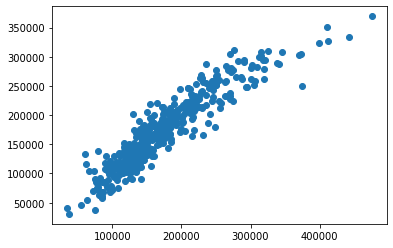

In [104]:
%matplotlib inline

# Plotting the predictions vs the test set
 
plt.scatter(y_test,y_pred)


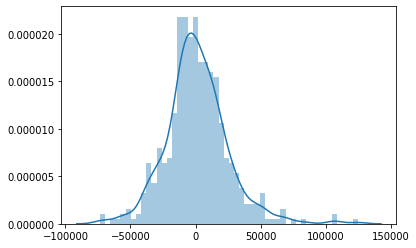

In [105]:
# Plotting the errors
sns.distplot((y_test-y_pred),bins=50)

In [97]:
myScore

NameError: name 'myScore' is not defined

<IPython.core.display.Javascript object>


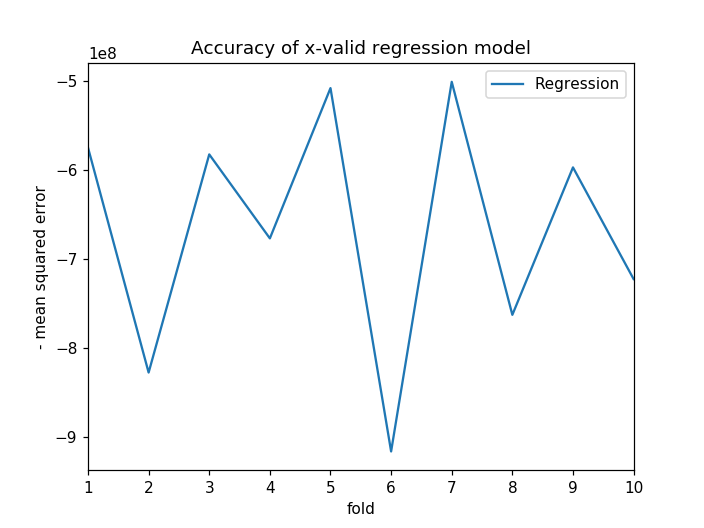

Text(0.5, 1.0, 'Accuracy of x-valid regression model')

In [102]:
# Plotting the accuracy

# Plot the Accuracy using the Cross validation score

In [111]:
# Retruns Columns

In [113]:
Score2.head()

,PID,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,RmAbvGrnd,OverallQuality,LotArea,BldgTp
0,526301100,1960,1960,112,0,1656,1656,1,7,6,31770,1
1,526350040,1961,1961,0,1,896,896,1,5,5,11622,1
2,526351010,1958,1958,108,1,1329,1329,1,6,6,14267,1
3,526353030,1968,1968,0,3,2110,2110,2,8,7,11160,1
4,527105010,1997,1998,0,2,928,1629,2,6,5,13830,1


In [115]:
# Prop_Data_Final2 = Prop_Data[[columns]]

########################################
Prop_Data_Final2.head()

,PID,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,RmAbvGrnd,OverallQuality,LotArea,BldgTp,SalePrice
0,526301100,1960,1960,112,0,1656,1656,1,7,6,31770,1,215000
1,526350040,1961,1961,0,1,896,896,1,5,5,11622,1,105000
2,526351010,1958,1958,108,1,1329,1329,1,6,6,14267,1,172000
3,526353030,1968,1968,0,3,2110,2110,2,8,7,11160,1,244000
4,527105010,1997,1998,0,2,928,1629,2,6,5,13830,1,189900


## Step 8 - Implement KNN

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. 
A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 
If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

In [129]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

47.78

##### Congratulations! You nailed it!

In [ ]:
## Step 8 - Implement KNN